Algorithm:
• The algorithm begins by performing a breadth-first search (BFS) of the graph, starting at  the node X. 
• Note that the level of each node in the BFS presentation is the length of the shortest path from X to that node. 
• The edges that go between nodes at the same level can never be part of a shortest path from X. Edges between levels are called DAG edges (“DAG” stands for directed, acyclic graph). 
• Each DAG edge will be part of at least one shortest path from root X. 
• If there is a DAG edge (Y, Z), where Y is at the level above Z (i.e., closer to the root), then we shall call Y a parent of Z and Z a child of Y , although parents are not necessarily unique in a DAG as they would be in a tree.
• In order to exploit the betweenness of edges, need to calculate the number of shortest paths going through each edge., describe as method called the Girvan-Newman (GN) Algorithm.
    o visits each node X once and computes the number of shortest paths from X to each of the other nodes that go through each of the edges.
• The algorithm begins by performing a breadth-first search (BFS) of the graph, starting at the node X. 
    o Note that the level of each node in the BFS presentation is the length of the shortest path from X to that node. 
• Thus, the edges that go between nodes at the same level can never be part of a shortest path from X. 
 Edges between levels are called DAG edges (“DAG” stands for directed, acyclic graph) and each DAG edge will be part of at least one shortest path from root X. 
 If there is a DAG edge (Y, Z), where Y is at the level above Z (i.e., closer to the root), then we shall call Y a parent of Z and Z a child of Y , although parents are not necessarily unique in a DAG as they would be in a tree

The rules for the calculation are as follows: 
1. Each leaf in the DAG (a leaf is a node with no DAG edges to nodes at levels below) gets a credit of 1. 
2. Each node that is not a leaf gets a credit equal to 1 plus the sum of the credits of the DAG edges from that node to the level below.
3. A DAG edge e entering node Z from the level above is given a share of the credit of Z proportional to the fraction of shortest paths from the root to Z that go through e. 

# Manual Input

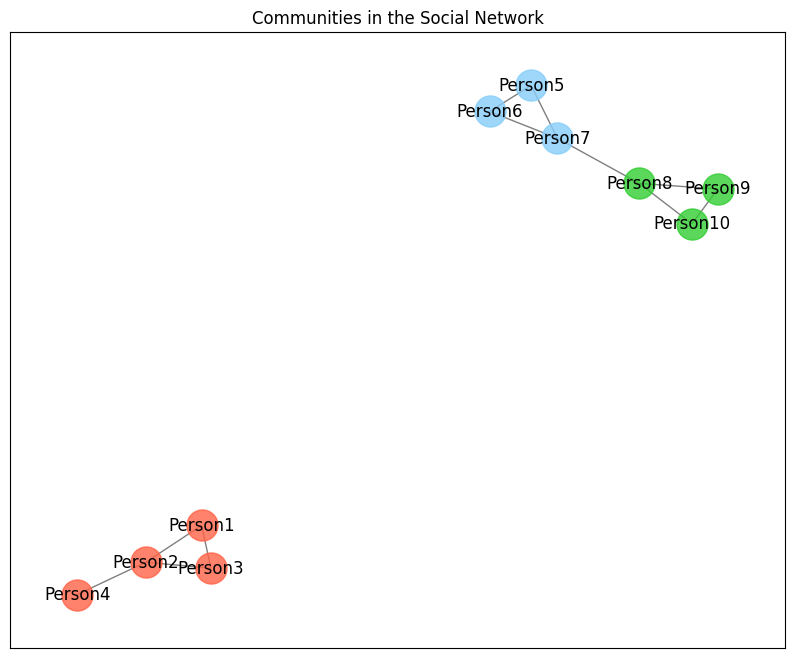

Communities detected by the Girvan-Newman algorithm:
Community 1: ['Person1', 'Person2', 'Person3', 'Person4']
Community 2: ['Person5', 'Person6', 'Person7']
Community 3: ['Person10', 'Person8', 'Person9']


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
G = nx.Graph()
edges = [
    ('Person1', 'Person2'), ('Person1', 'Person3'), ('Person2', 'Person3'), ('Person2', 'Person4'),
    ('Person5', 'Person6'), ('Person5', 'Person7'), ('Person6', 'Person7'), ('Person7', 'Person8'),
    ('Person9', 'Person10'), ('Person9', 'Person8'), ('Person10', 'Person8')
]

G.add_edges_from(edges)
def find_communities(graph):
    comp = girvan_newman(graph)
    limited = tuple(sorted(c) for c in next(comp))  
    return limited

communities = find_communities(G)
def draw_communities(graph, communities):
    pos = nx.spring_layout(graph)
    colors = ['#FF6347', '#87CEFA', '#32CD32', '#FFD700', '#DA70D6']  

    plt.figure(figsize=(10, 8))

    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(graph, pos, nodelist=community, node_color=colors[i % len(colors)], node_size=500, alpha=0.8)
    
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    nx.draw_networkx_labels(graph, pos)

    plt.title("Communities in the Social Network")
    plt.show()

draw_communities(G, communities)
print("Communities detected by the Girvan-Newman algorithm:")
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


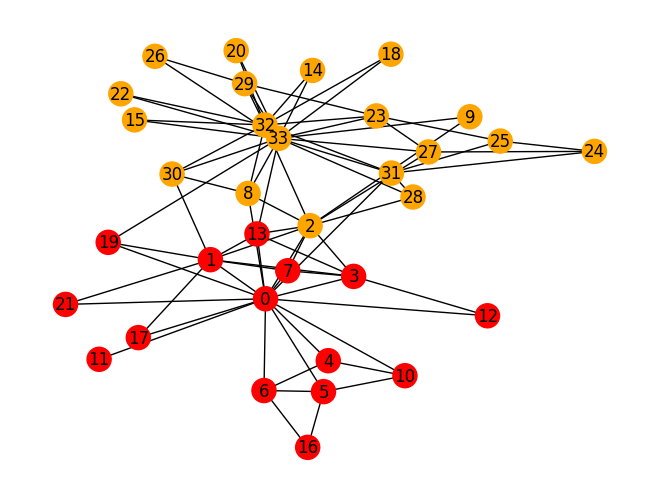

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

G = nx.karate_club_graph()
communities = girvan_newman(G)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append("red")
    else:
        color_map.append("orange")
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

Enter input 1:


 5


Enter input 2:


 0


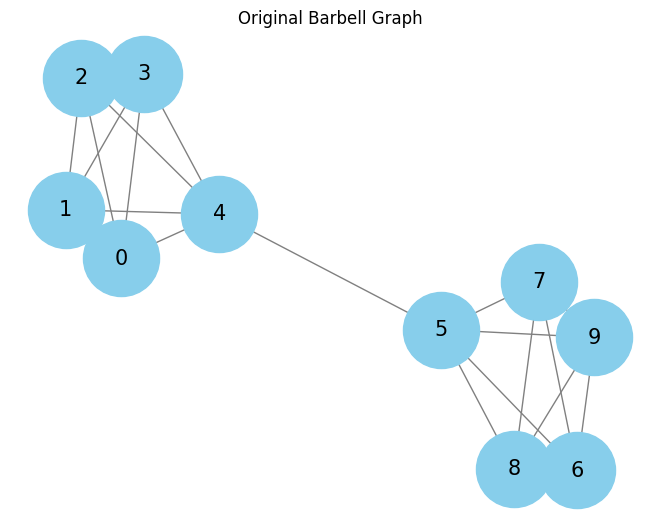

The number of connected components are 1
The number of connected components are 2


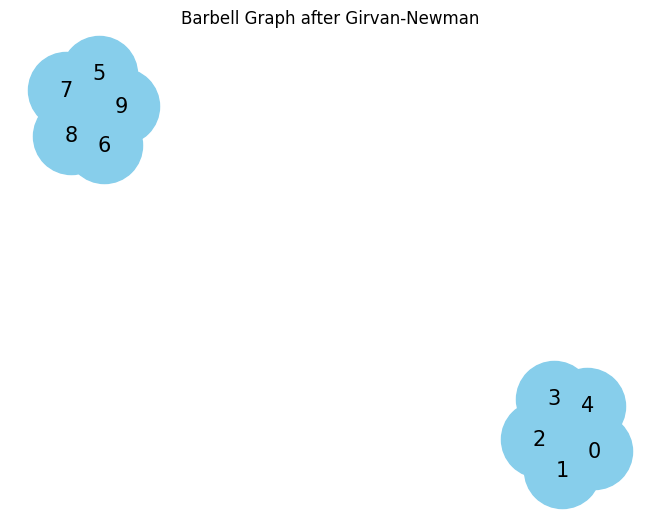

Barbell Graph components:
Component 1: [0, 1, 2, 3, 4]
Component 2: [5, 6, 7, 8, 9]


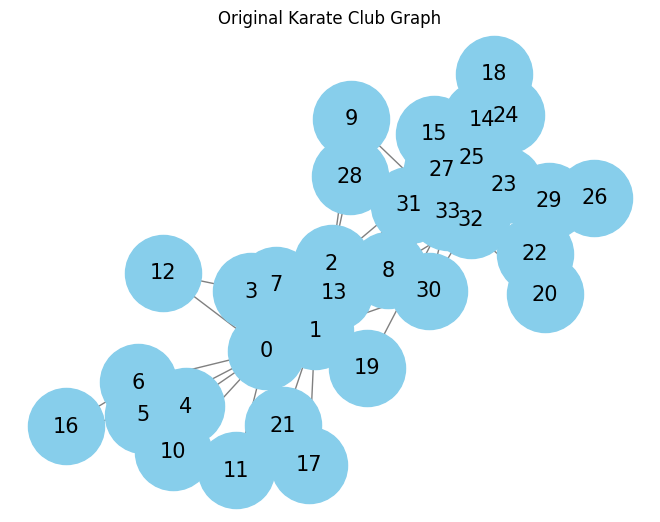

The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 2


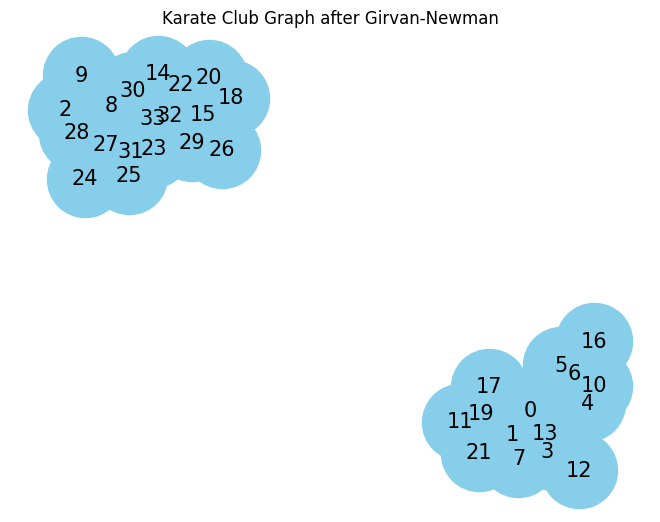

Karate Club Graph components:
Component 1: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Component 2: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def edge_to_remove(g):
    edge_betweenness = nx.edge_betweenness_centrality(g)
    list_of_tuples = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)
    return list_of_tuples[0][0]

def girvan(g):
    num_components = nx.number_connected_components(g)
    print(f"The number of connected components are {num_components}")
    
    while num_components == 1:
        u, v = edge_to_remove(g)
        g.remove_edge(u, v)
        num_components = nx.number_connected_components(g)
        print(f"The number of connected components are {num_components}")
    
    return list(nx.connected_components(g))

def visualize_graph(g, title):
    pos = nx.spring_layout(g)
    plt.figure()
    nx.draw(g, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=3000, font_size=15)
    plt.title(title)
    plt.show()

if __name__ == "__main__":
    print("Enter input 1:")
    k = int(input())
    print("Enter input 2:")
    l = int(input())

    g = nx.barbell_graph(k, l)
    visualize_graph(g, "Original Barbell Graph")
    components = girvan(g)
    visualize_graph(g, "Barbell Graph after Girvan-Newman")

    print("Barbell Graph components:")
    for i, component in enumerate(components):
        print(f"Component {i+1}: {list(component)}")
    
    g1 = nx.karate_club_graph()
    visualize_graph(g1, "Original Karate Club Graph")
    components_karate = girvan(g1)
    visualize_graph(g1, "Karate Club Graph after Girvan-Newman")

    print("Karate Club Graph components:")
    for i, component in enumerate(components_karate):
        print(f"Component {i+1}: {list(component)}")


Communities detected:
{'A', 'B', 'C', 'E', 'D'}
{'G', 'F', 'H'}


C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


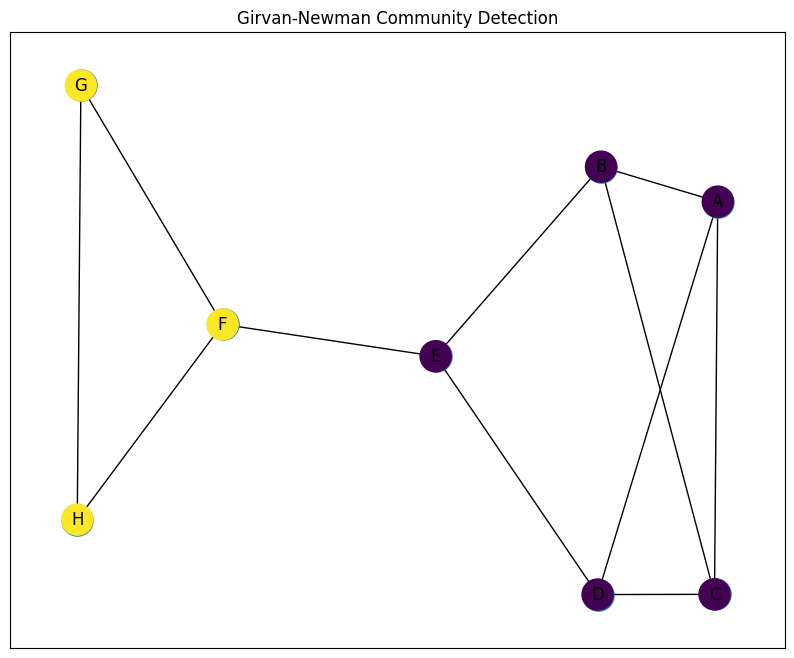

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community import modularity

# Create a social network graph
G = nx.Graph()

# Add nodes and edges to the graph (example data)
edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'C'), ('B', 'E'), ('C', 'D'),
    ('D', 'E'), ('E', 'F'), ('F', 'G'),
    ('F', 'H'), ('G', 'H')
]
G.add_edges_from(edges)

# Apply the Girvan-Newman algorithm
def girvan_newman_algorithm(G):
    comp = girvan_newman(G)
    for communities in comp:
        # Yield communities
        yield communities

# Get communities from Girvan-Newman algorithm
def get_communities(G):
    return list(girvan_newman_algorithm(G))[0]

# Draw the graph with communities
def draw_communities(G, communities):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, cmap=plt.get_cmap('viridis', len(communities)))
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    
    # Draw edges with color based on community
    colors = [communities[node] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=500, cmap=plt.get_cmap('viridis', len(communities)))
    plt.title("Girvan-Newman Community Detection")
    plt.show()

# Main
communities = get_communities(G)
print("Communities detected:")
for community in communities:
    print(community)

# Map nodes to community index for visualization
node_community_map = {}
for i, community in enumerate(communities):
    for node in community:
        node_community_map[node] = i

draw_communities(G, node_community_map)

Detected Communities: [{1, 2, 3}, {4, 5, 6, 7}, {8, 12, 13, 14}, {9, 10, 11}]


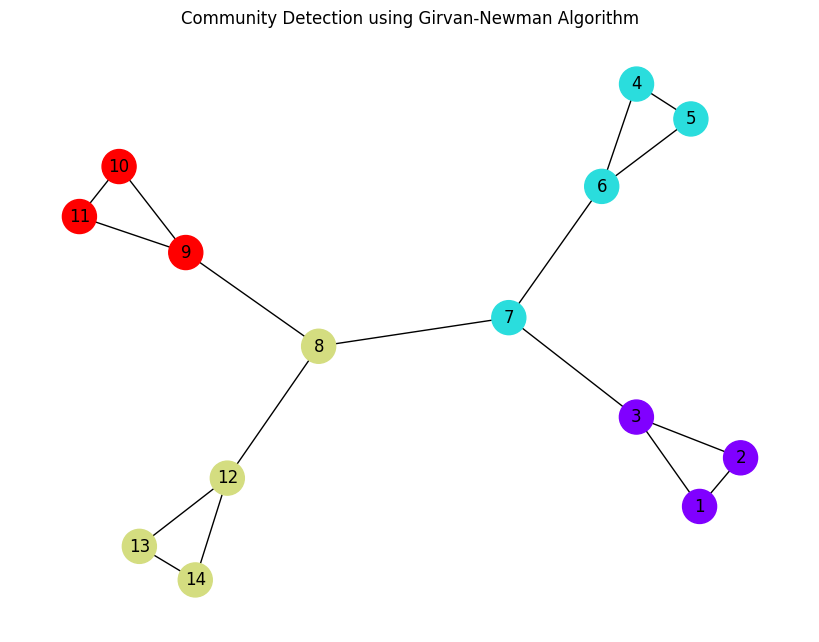

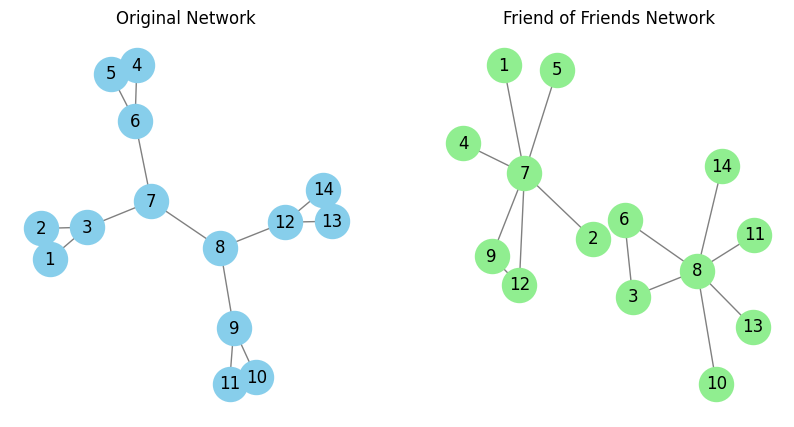

In [2]:
# %% 
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph based on the given edges
G = nx.Graph()
edges = [
    (1, 3), (1, 2), (2, 1), (2, 3), (3, 1), (3, 2), (3, 7), (4, 6), (4, 5),
    (5, 4), (5, 6), (6, 4), (6, 5), (6, 7), (7, 6),
    (7, 8), (8, 9), (9, 10), (9, 11), (8, 12), (10, 11),
    (12, 13), (13, 14), (12, 14)
]
G.add_edges_from(edges)

# Girvan-Newman algorithm implementation
def girvan_newman(graph, max_communities=4):
    # Make a copy of the graph to avoid modifying the original
    G_copy = graph.copy()
    communities = [list(G_copy.nodes)]
    
    # Continue removing edges until we reach the desired number of communities
    while len(communities) < max_communities:
        # Compute edge betweenness centrality for all edges
        edge_betweenness = nx.edge_betweenness_centrality(G_copy)
        
        # Find the edge with the highest betweenness centrality and remove it
        max_edge = max(edge_betweenness, key=edge_betweenness.get)
        G_copy.remove_edge(*max_edge)
        
        # Find communities in the modified graph
        communities = list(nx.connected_components(G_copy))
    
    return communities

# Run the Girvan-Newman algorithm on the graph
communities = girvan_newman(G, max_communities=4)
print("Detected Communities:", communities)

# Color nodes based on communities for visualization
color_map = []
for node in G:
    for i, community in enumerate(communities):
        if node in community:
            color_map.append(i)
            break

# Visualize the graph with communities
plt.figure(figsize=(8, 6))
nx.draw(G, node_color=color_map, with_labels=True, cmap=plt.cm.rainbow, node_size=600)
plt.title("Community Detection using Girvan-Newman Algorithm")
plt.show()

# %% 
# Friend-of-Friends function based on mutual friends
def friend_of_friends(graph):
    # Create a new graph for friend-of-friend relationships
    fof_graph = nx.Graph()
    for node in graph.nodes:
        friends = set(graph.neighbors(node))
        for friend in friends:
            # Find mutual friends (friend of friend)
            fof_friends = set(graph.neighbors(friend)) - friends - {node}
            for fof in fof_friends:
                fof_graph.add_edge(node, fof)
    return fof_graph

# Run the Friend-of-Friends algorithm on the graph
fof_graph = friend_of_friends(G)

# Visualize the original graph
plt.figure(figsize=(10, 5))
plt.subplot(121)
nx.draw(G, with_labels=True, node_color="skyblue", edge_color="gray", node_size=600, font_size=12)
plt.title("Original Network")

# Visualize the Friend-of-Friends graph
plt.subplot(122)
nx.draw(fof_graph, with_labels=True, node_color="lightgreen", edge_color="gray", node_size=600, font_size=12)
plt.title("Friend of Friends Network")
plt.show()
